In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from itertools import combinations

# 讀取數據
file_path = "F:\\All data\\Patient_Signal\\PPG.csv"
data = pd.read_csv(file_path, header=None)
data.columns = ['Name', 'i', 'Bad', 'hands', 'label', 'systolic peak', 'Diastolic peak', 'Cardiac cycle', 
                'Cycle Area', 'SSI', 'Peak to Valley', 'Systolic peak y', 'Delta_T', 
                '1st Derivative cycle', '1st Derivative peak', 'Ratio_BA', 'Ratio_CA', 'Ratio_DA', 
                'Ratio_BDCE_A', 'Ratio_CDB_A']

# 提取特徵和標籤
info_columns = data[['Name', 'i', 'Bad', 'hands']]
X = data.iloc[:, 5:]  # 特徵列
y = data['label']     # 標籤

# 分割訓練和測試集（保持 DataFrame 格式以便列名操作）
X_train_df, X_test_df, y_train, y_test, info_train, info_test = train_test_split(X, y, info_columns, test_size=0.3, random_state=42)

In [ ]:
def exhaustive_feature_selection(X_train_df, y_train, X_test_df, y_test, feature_names):
    best_accuracy = 0
    best_features = None
    best_model = None
    best_y_pred = None
    
    # 遍歷所有的特徵組合
    for num_features in range(1, len(feature_names) + 1):
        for subset in combinations(feature_names, num_features):
            # 建立訓練子集和測試子集
            X_train_subset = X_train_df[list(subset)]
            X_test_subset = X_test_df[list(subset)]
            
            # 為每個子集初始化新的標準化器
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_subset)
            X_test_scaled = scaler.transform(X_test_subset)
            
            # 訓練 SVM 模型
            model = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42)
            model.fit(X_train_scaled, y_train)
            
            # 評估模型
            y_pred = model.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            
            # 更新最佳結果
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = subset
                best_model = model
                best_y_pred = y_pred
    
    return best_accuracy, best_features, best_model, best_y_pred

最佳準確率: 0.8106744556558683
最佳特徵組合: ('Ratio_BA',)


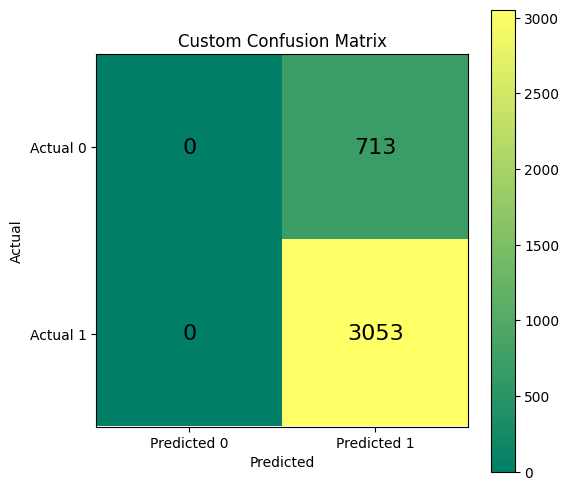

Accuracy: 0.8107
Sensitivity (Recall): 0.0000
Specificity: 1.0000
Precision: 0.0000
F1-Score: 0.0000


In [14]:
# 提取列名作為特徵名稱
feature_names = X.columns

# 使用窮舉法進行特徵選擇
best_accuracy, best_features, best_model, best_y_pred = exhaustive_feature_selection(X_train_df, y_train, X_test_df, y_test, feature_names)

# 輸出最佳特徵組合和最佳準確率
print("最佳準確率:", best_accuracy)
print("最佳特徵組合:", best_features)

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='summer')
plt.colorbar()
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), fontsize=16, ha='center', va='center')
plt.xticks([0, 1], labels=['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], labels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Custom Confusion Matrix')
plt.show()

# 計算並輸出性能指標
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1]

fp = conf_matrix[1, 0]
tn = conf_matrix[1, 1]
accuracy = (tp + tn) / (tp + fn + fp + tn)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")